In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("daily_data.csv")

In [20]:
data['Dates'] = pd.to_datetime(data['Dates'])
data = data.set_index('Dates')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 971 entries, 2013-12-13 to 2017-10-20
Data columns (total 5 columns):
Soybean     971 non-null float64
Corn        971 non-null float64
CrudeOil    971 non-null float64
DXY         971 non-null float64
S&P500      971 non-null float64
dtypes: float64(5)
memory usage: 45.5 KB


In [23]:
data.head()

,Soybean,Corn,CrudeOil,DXY,S&P500
Dates,,,,,
2013-12-13,1101.75,489.50,80.46,80.209999,1775.319946
2013-12-16,1106.50,479.25,80.78,80.070000,1786.540039
2013-12-17,1109.00,474.75,80.91,80.059998,1781.000000
2013-12-18,1103.75,474.50,80.25,80.110001,1810.650024
2013-12-19,1107.25,472.00,79.90,80.629997,1809.599976


In [39]:
print("Soybean: [", data['Soybean'].min(), ";", data['Soybean'].max(), "]")
print("Corn: [", data['Corn'].min(), ";", data['Corn'].max(), "]")
print("Corn: [", data['Corn'].min(), ";", data['Corn'].max(), "]")
print("Crude Oil: [", data['CrudeOil'].min(), ";", data['CrudeOil'].max(), "]")
print("DXY: [", data['DXY'].min(), ";", data['DXY'].max(), "]")
print("S&P500: [", data['S&P500'].min(), ";", data['S&P500'].max(), "]")

Soybean: [ 102.7 ; 1135.75 ]
Corn: [ 344.5 ; 489.5 ]
Corn: [ 344.5 ; 489.5 ]
Crude Oil: [ 38.22 ; 90.06 ]
DXY: [ 79.139999 ; 103.290001 ]
S&P500: [ 1741.890015 ; 2575.209961 ]


In [40]:
BuyHold_Soybean = data['Soybean'] / float(data['Soybean'][:1]) -1
BuyHold_Corn = data['Corn'] / float(data['Corn'][:1]) -1
BuyHold_CrudeOil = data['CrudeOil'] / float(data['CrudeOil'][:1]) -1
BuyHold_DXY = data['DXY'] / float(data['DXY'][:1]) -1
BuyHold_SP = data['S&P500'] / float(data['S&P500'][:1]) -1
BuyHold_20Each = 0.2 * (BuyHold_Soybean + BuyHold_Corn + BuyHold_CrudeOil + BuyHold_DXY + BuyHold_SP)

/home/eraminecpp/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


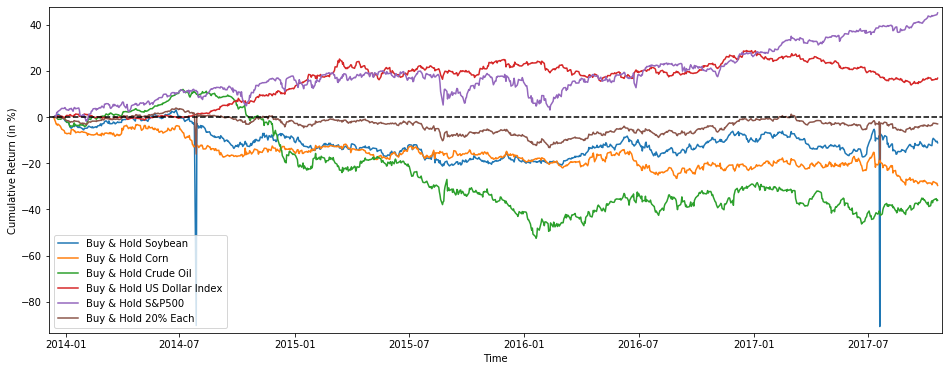

In [25]:
plt.figure(figsize=(16,6))
plt.plot(BuyHold_Soybean*100,     label='Buy & Hold Soybean')
plt.plot(BuyHold_Corn*100,    label='Buy & Hold Corn')
plt.plot(BuyHold_CrudeOil*100,  label='Buy & Hold Crude Oil')
plt.plot(BuyHold_DXY*100,    label='Buy & Hold US Dollar Index')
plt.plot(BuyHold_SP*100,    label='Buy & Hold S&P500')
plt.plot(BuyHold_20Each*100, label='Buy & Hold 20% Each')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

In [26]:
Soybean1Y = data['Soybean'] / data['Soybean'].shift(252) -1
Corn1Y = data['Corn'] / data['Corn'].shift(252) -1
CrudeOil1Y = data['CrudeOil'] / data['CrudeOil'].shift(252) -1
DXY1Y = data['DXY'] / data['DXY'].shift(252) -1
SP1Y = data['S&P500'] / data['S&P500'].shift(252) -1
Each201Y = 0.2 * (BuyHold_Soybean + BuyHold_Corn + BuyHold_CrudeOil + BuyHold_DXY + BuyHold_SP)

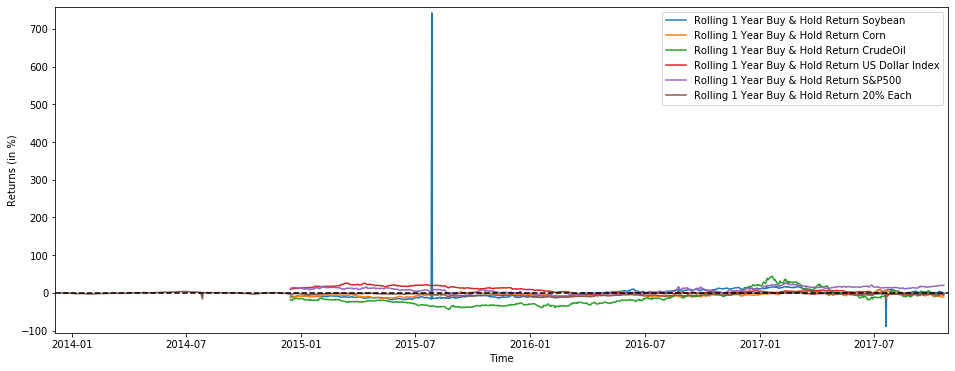

In [27]:
plt.figure(figsize=(16,6))
plt.plot(Soybean1Y*100,     label='Rolling 1 Year Buy & Hold Return Soybean')
plt.plot(Corn1Y*100,    label='Rolling 1 Year Buy & Hold Return Corn')
plt.plot(CrudeOil1Y*100,  label='Rolling 1 Year Buy & Hold Return CrudeOil')
plt.plot(DXY1Y*100,    label='Rolling 1 Year Buy & Hold Return US Dollar Index')
plt.plot(SP1Y*100,    label='Rolling 1 Year Buy & Hold Return S&P500')
plt.plot(Each201Y*100, label='Rolling 1 Year Buy & Hold Return 20% Each')
plt.xlabel('Time')
plt.ylabel('Returns (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()